Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


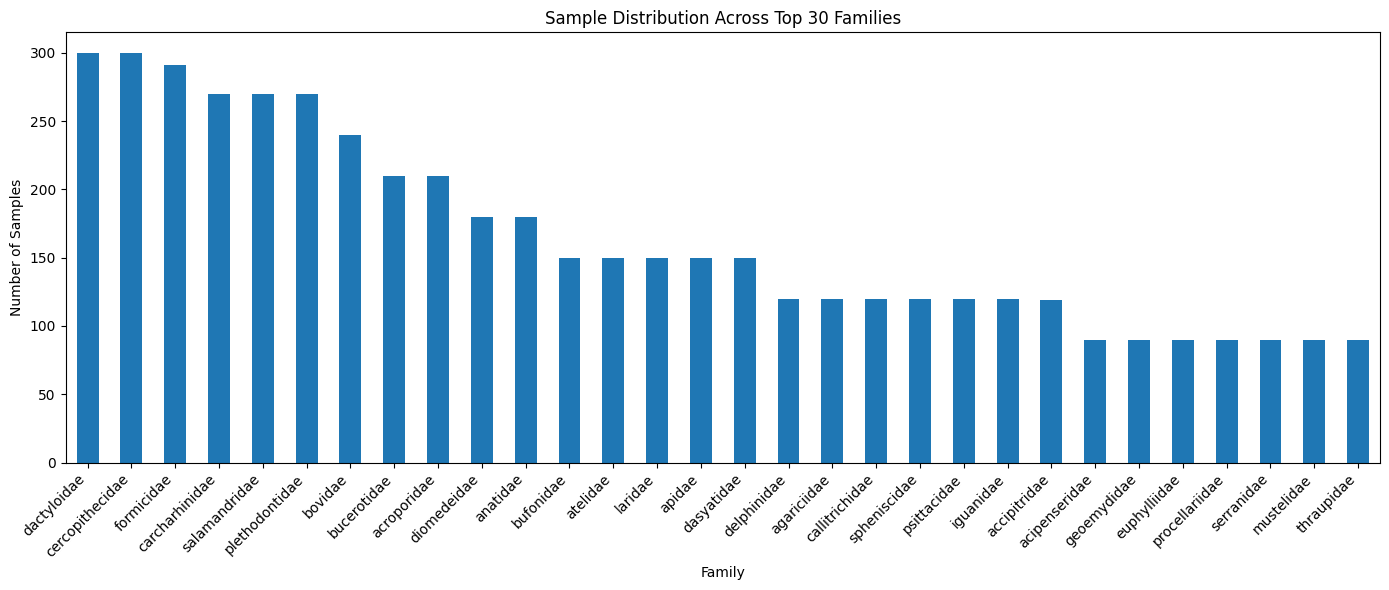

Most common family: dactyloidae (300 samples)
Least common family: siluridae (29 samples)
Imbalance ratio: 10.3x


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
# Mount Google Drive
drive.mount('/content/drive')
# Path to original metadata CSV (only used for EDA, not required for training)
metadata_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/species_metadata.csv'
# Load the metadata
df = pd.read_csv(metadata_path)

# Count samples per class (family/genus/species)
class_counts = df['family'].value_counts()

# Plot distribution
plt.figure(figsize=(14, 6))
class_counts[:30].plot(kind='bar')
plt.title('Sample Distribution Across Top 30 Families')
plt.ylabel('Number of Samples')
plt.xlabel('Family')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check for imbalance
print(f"Most common family: {class_counts.index[0]} ({class_counts.iloc[0]} samples)")
print(f"Least common family: {class_counts.index[-1]} ({class_counts.iloc[-1]} samples)")
print(f"Imbalance ratio: {class_counts.iloc[0]/class_counts.iloc[-1]:.1f}x")

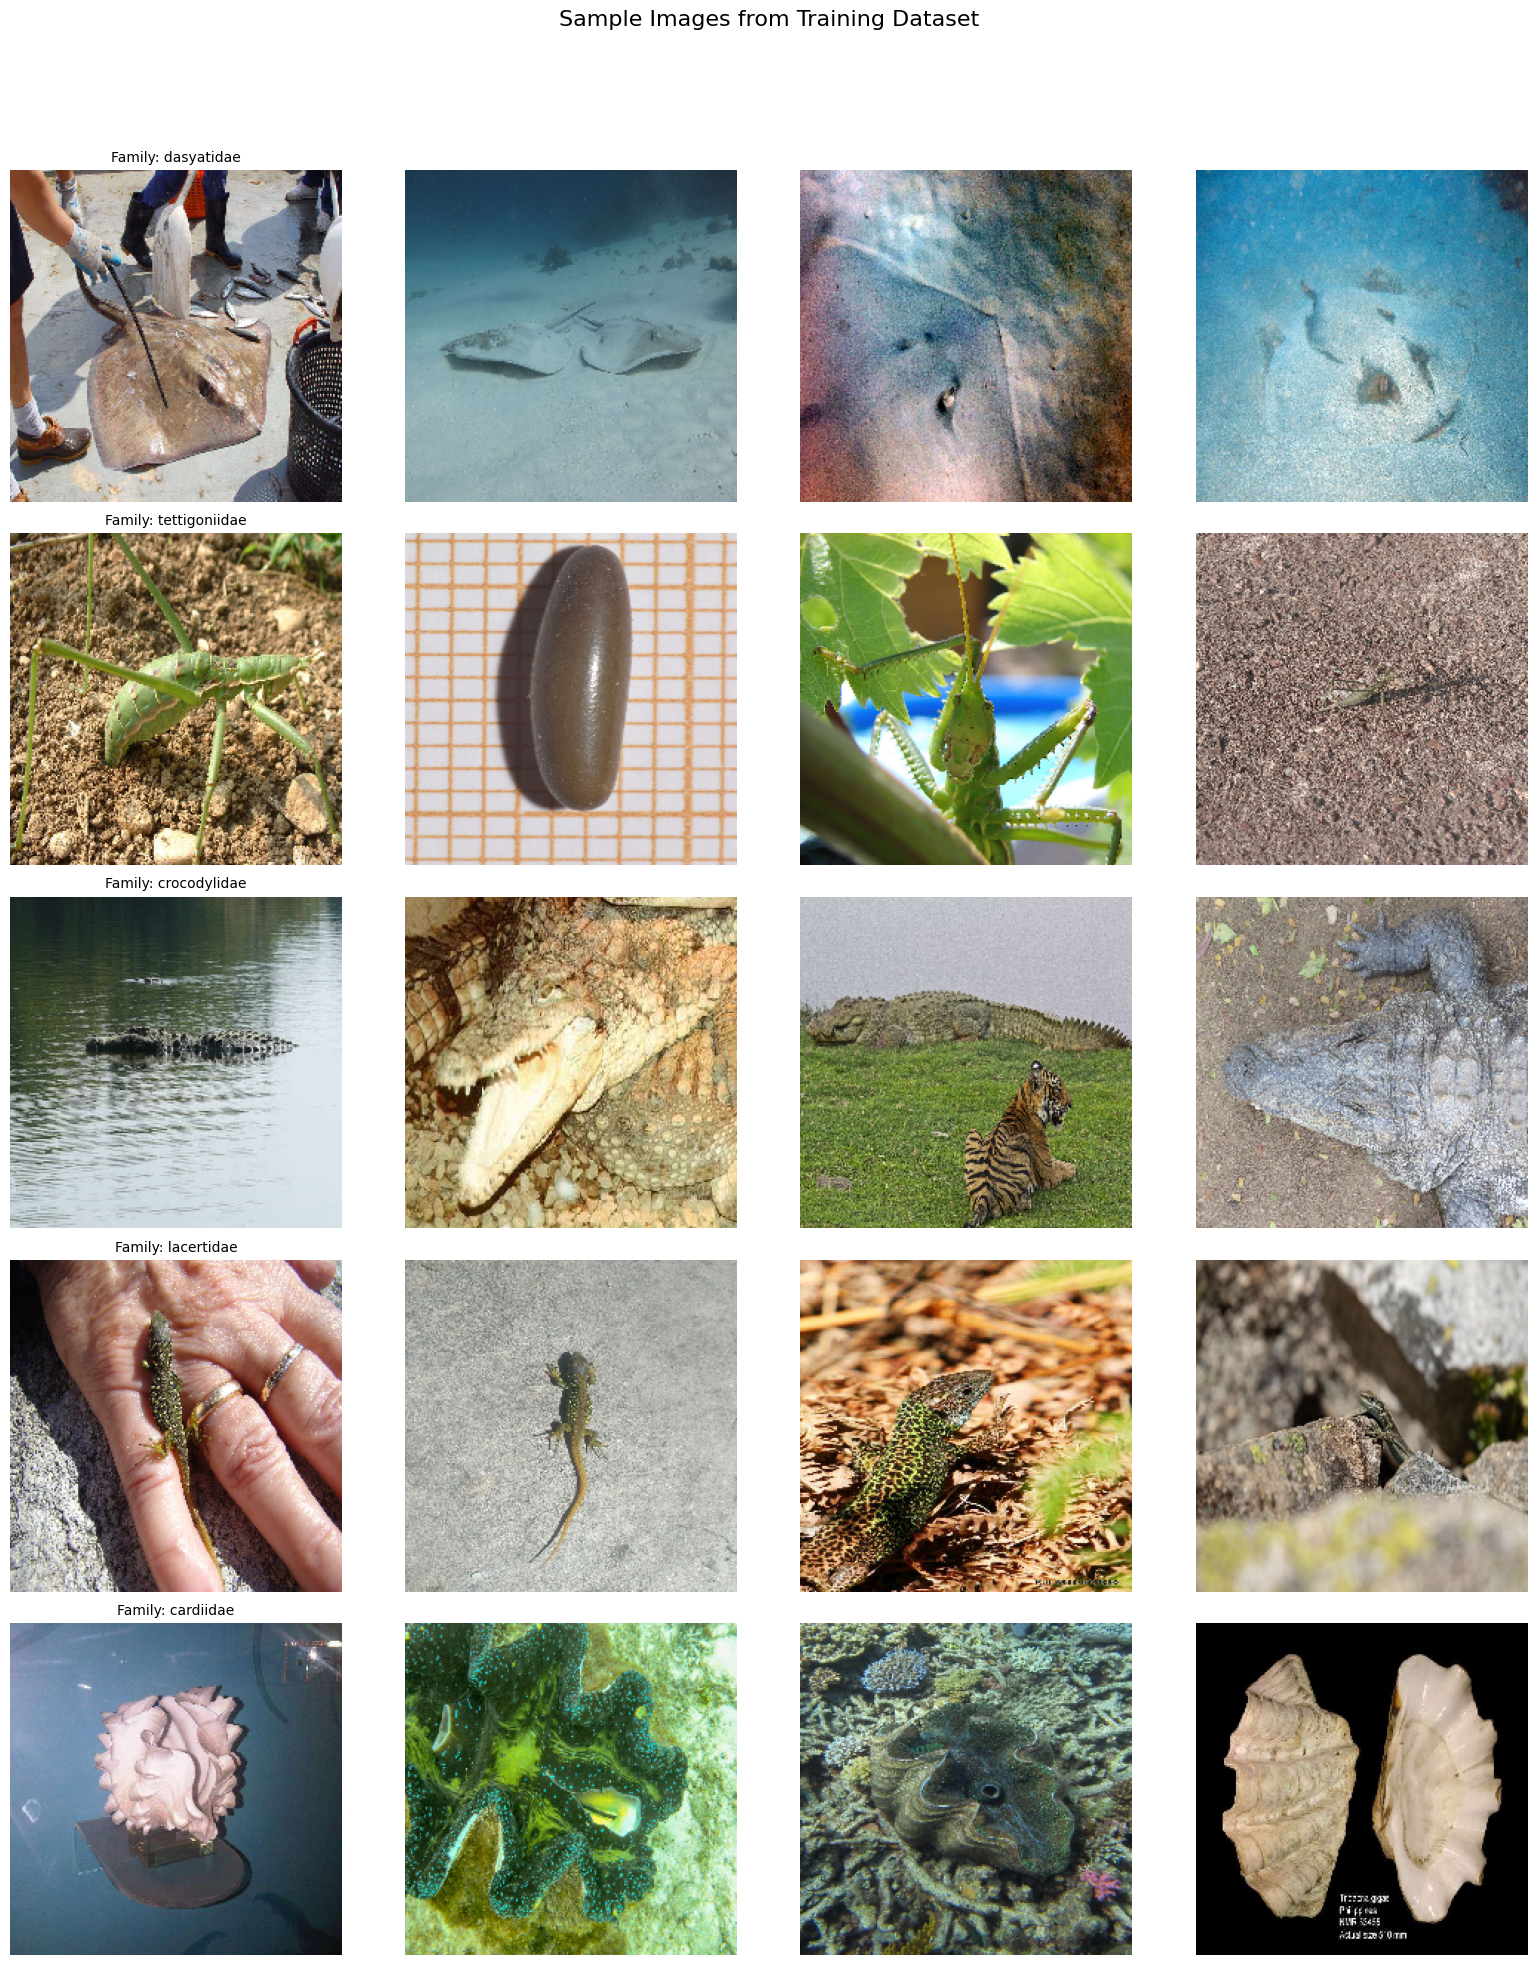

In [ ]:


# Set the path to your training data directory
train_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/data/train'

# Function to load and display a grid of sample images
def visualize_training_samples(train_dir, num_classes=5, samples_per_class=3):
    # Get list of class directories
    class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

    # If there are too many classes, randomly sample some
    if len(class_dirs) > num_classes:
        class_dirs = random.sample(class_dirs, num_classes)
    else:
        num_classes = len(class_dirs)

    plt.figure(figsize=(4*samples_per_class, 4*num_classes))

    for i, class_dir in enumerate(class_dirs):
        class_path = os.path.join(train_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # If there are too many images, randomly sample some
        if len(image_files) > samples_per_class:
            image_files = random.sample(image_files, samples_per_class)
        else:
            samples_per_class_actual = len(image_files)

        # Display images for this class
        for j, img_file in enumerate(image_files):
            img_path = os.path.join(class_path, img_file)

            # Load and display the image
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]

            plt.subplot(num_classes, samples_per_class, i*samples_per_class + j + 1)
            plt.imshow(img_array)
            if j == 0:  # Only show class name for the first image in each row
                plt.title(f'Family: {class_dir}', fontsize=10)
            plt.axis('off')

    plt.tight_layout()
    plt.suptitle('Sample Images from Training Dataset', fontsize=16)
    plt.subplots_adjust(top=0.9)  # Make room for suptitle
    plt.show()


# Display images from randomly selected classes
visualize_training_samples(train_dir, num_classes=5, samples_per_class=4)

